# Chapter 03 - Exercises

## 3.1

### Answers

* see below

In [3]:
# %load ../snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

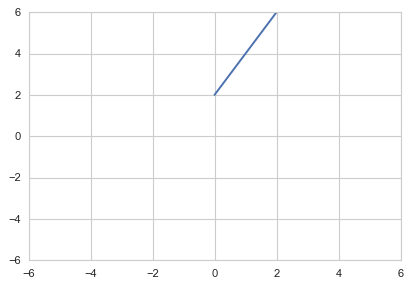

In [10]:
# (0,2) -> (2,6)
plt.plot([0,2], [2,6])
plt.xlim([-6,6])
plt.ylim([-6,6]);

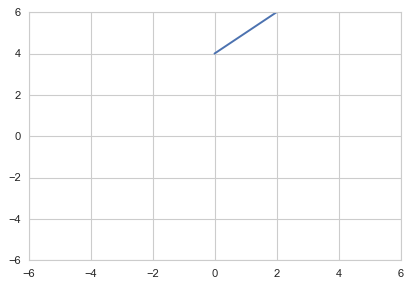

In [11]:
# (0,4) -> (2,6)
plt.plot([0,2], [4,6]);
plt.xlim([-6,6])
plt.ylim([-6,6]);

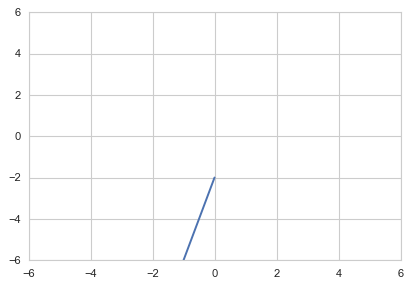

In [12]:
# (0, -2) -> (-1, -6)
plt.plot([0,-1], [-2,-6]);
plt.xlim([-6,6])
plt.ylim([-6,6]);

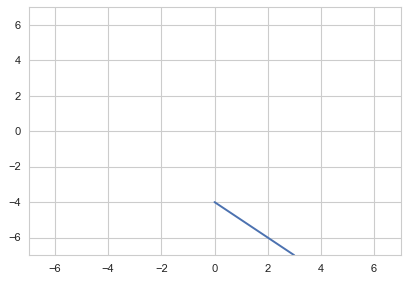

In [13]:
# (0, -4) -> (3, -7)
plt.plot([0,3], [-4,-7]);
plt.xlim([-7,7])
plt.ylim([-7,7]);

## 3.3

### Answers

* a) y = 2.000000 x + 2.000000
* b) y = 1.000000 x + 4.000000
* c) y = 4.000000 x + -2.000000
* d) y = -1.000000 x + -4.000000

In [17]:
def line_from_points(p1, p2):
    slope = (p2[1]-p1[1]) / (p2[0]-p1[0])
    intercept = p1[1] - (slope * p1[0])
    print("y = %f x + %f" % (slope, intercept))

In [18]:
line_from_points((0,2), (2,6))

y = 2.000000 x + 2.000000


In [19]:
line_from_points((0,4), (2,6))

y = 1.000000 x + 4.000000


In [21]:
line_from_points((0, -2), (-1, -6))

y = 4.000000 x + -2.000000


In [20]:
line_from_points((0, -4), (3, -7))

y = -1.000000 x + -4.000000


## 3.5

### Answers

* a) 2, 3
* b) 1, 1
* c) 3, -2
* d) 5, 0
* e) -2, 4

## 3.7

### Answers

* note: the fixed width format is a bit messed up in this file, need to clean it up manually first pre-load
* y = -1.2 x + 2.0

In [26]:
ex3_7 = pd.read_fwf("../data/ch03/Ex3_7.dat", names=["x", "y"])
ex3_7.head()

,x,y
0,-2.0,4.0
1,-1.0,3.0
2,0.0,3.0
3,1.0,1.0
4,2.0,-1.0


In [40]:
n = ex3_7.x.size
SSxy = ex3_7.cov()['x']['y'] * (n - 1)
SSxx = ex3_7.x.var() * (n-1)
b1 = SSxy / SSxx
b1

-1.2

In [41]:
b0 = ex3_7.y.mean() - (b1 * ex3_7.x.mean())
b0

2.0

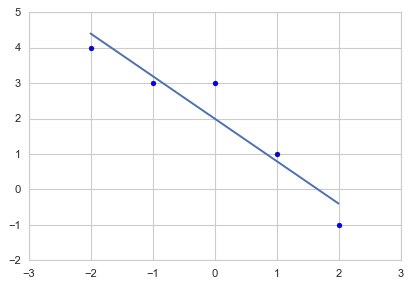

In [42]:
plt.scatter(ex3_7.x, ex3_7.y)
yHat = b1 * ex3_7.x + b0
plt.plot(ex3_7.x, yHat);

## 3.9

### Answers

* a) y = -b1 x + b0; negative
* b) yes
* c) no

## 3.11

### Answers

* d) b1 = 0.0032 - for each 1 vehicle increase, congestion time increases by 0.0032 minutes; b0 = -0.001 -- in the absence of any vehicles, congestion time would be -0.001 minutes

In [45]:
wh = pd.read_fwf("../data/ch03/warehouse.dat", names=["vehicles", "time"], colspecs="infer")

0.0032142857142857138

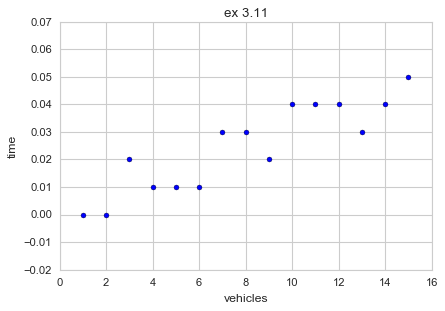

In [48]:
plt.scatter(wh.vehicles, wh.time)

plt.xlabel("vehicles")
plt.ylabel("time")
plt.title("ex 3.11");

In [49]:
n = wh.vehicles.size
SSxy = wh.cov()['vehicles']['time'] * (n - 1)
SSxx = wh.vehicles.var() * (n-1)
b1 = SSxy / SSxx
b1

0.0032142857142857138

In [50]:
b0 = wh.time.mean() - (b1 * wh.vehicles.mean())
b0

-0.0010476190476190438

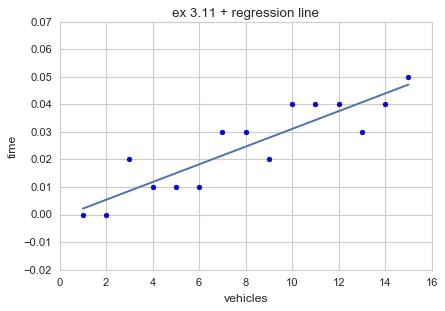

In [52]:
plt.scatter(wh.vehicles, wh.time)
yHat = b1 * wh.vehicles + b0
plt.plot(wh.vehicles, yHat)
plt.xlabel("vehicles")
plt.ylabel("time")
plt.title("ex 3.11 + regression line");

## 3.13

### Answers

* a) y = -0.0023 x + 6.252
* b) b1: for each 1 ppm increase in pectin, sweetness index decreases by 0.0023; b0: in absence of pectin, sweetness index starts at 6.252
* c) 5.558880144308942

In [54]:
oj = pd.read_fwf("../data/ch03/Ojuice.dat", names=["run", "sweetness", "pectin"], colspecs="infer")
oj.head()

,run,sweetness,pectin
0,1,5.2,220
1,2,5.5,227
2,3,6.0,259
3,4,5.9,210
4,5,5.8,224


In [55]:
n = oj.run.size
SSxx = oj.pectin.var() * (n-1)
SSxy = oj.cov()['pectin']['sweetness'] * (n-1)
b1 = SSxy / SSxx
b1

-0.0023106258824640877

In [56]:
b0 = (oj.sweetness.mean() - b1 * oj.pectin.mean())
b0

6.2520679090481686

In [57]:
yHat = b1 * oj.pectin + b0

In [58]:
sweetnessIndex = b1 * 300 + b0
sweetnessIndex

5.558880144308942

## 3.15

### Answers

* estimate line : E(y) = 0.57044 + 0.02642 x
* interpret betas: for each 1 position increase, recall goes up by a factor of 0.02642; at position 0, recall is 0.570

In [59]:
ng = pd.read_fwf("../data/ch03/namegame2.dat", colspecs="infer", names=["position", "recall"])
ng.head()

,position,recall
0,2,0.04
1,2,0.37
2,2,1.00
3,2,0.99
4,2,0.79


In [60]:
n = ng.position.size
SSxx = ng.position.var() * (n-1)
SSxy = ng.cov()['position']['recall'] * (n-1)
b1 = SSxy / SSxx
b1

0.026421957671957666

In [61]:
b0 = (ng.recall.mean() - b1 * ng.position.mean())
b0

0.57044312169312106

## n

### Answers

* 